#### Problem Statement

HELP International has raised around $10 million. The CEO needs to decide how to use this money strategically and effectively. You have been provided with a dataset named **`"country_data.csv"`**, which includes various features. The dataset comprises the following columns:

  - `country`: Name of the country.
  - `child_mort`: Child mortality rate, the number of deaths of children under 5 years of age per 1000 live births.
  - `exports`: Exports of goods and services as a percentage of the country's GDP.
  - `health`: Health expenditure as a percentage of the country's GDP.
  - `imports`: Imports of goods and services as a percentage of the country's GDP.
  - `income`: Net income per person in USD.
  - `inflation`: The rate at which the general level of prices for goods and services is rising, and subsequently, purchasing power is falling(%).
  - `life_expec`: Life expectancy at birth, indicating the number of years a newborn is expected to live.
  - `total_fer`: Total fertility rate, the average number of children that would be born to a woman over her lifetime.
  - `gdpp`: GDP per capita in USD, representing the average economic output per person.

As a data scientist / AI engineer, your task is to use this dataset to categorize / cluster the countries using socio-economic and health factors that determine the overall development of the country.

In [1]:
# **Dataset Credits**: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data 

# # Released under MIT License

# #Copyright (c) 2013 Mark Otto.

# #Copyright (c) 2017 Andrew Fong.)

**Import Necessary Libraries**

In [2]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering



### Task 1: Data Preparation and Exploration

1. Import the data from the `country_data.csv` file into a pandas DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use the `describe()` function to obtain the complete statistics for each feature.
5. Visualize the distribution of `child_mort, income, and gdpp` using histograms.
6. Create pairplots to visualize relationships between features.


In [5]:
# Import the dataset
df = pd.read_csv('/home/intellect/Documents/Data_Scientist/Hirachical_Cluster/country_data.csv')

# Display the number of rows and columns
df.shape

# Display the first few rows of the dataset in DataFrame format
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Basic statistics for each feature.
df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


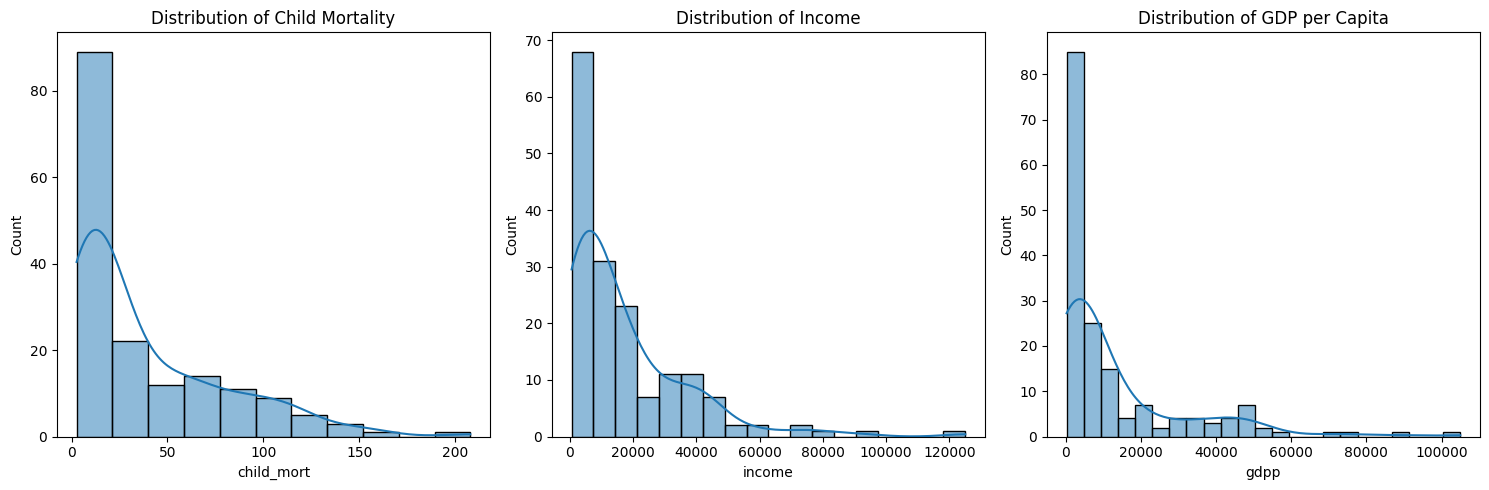

In [7]:
# Visualize the distribution of 'child_mort', 'income', and 'gdpp'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['child_mort'], kde=True)
plt.title('Distribution of Child Mortality')
plt.subplot(1, 3, 2)
sns.histplot(df['income'], kde=True)
plt.title('Distribution of Income')
plt.subplot(1, 3, 3)
sns.histplot(df['gdpp'], kde=True)
plt.title('Distribution of GDP per Capita')
plt.tight_layout()
plt.show()

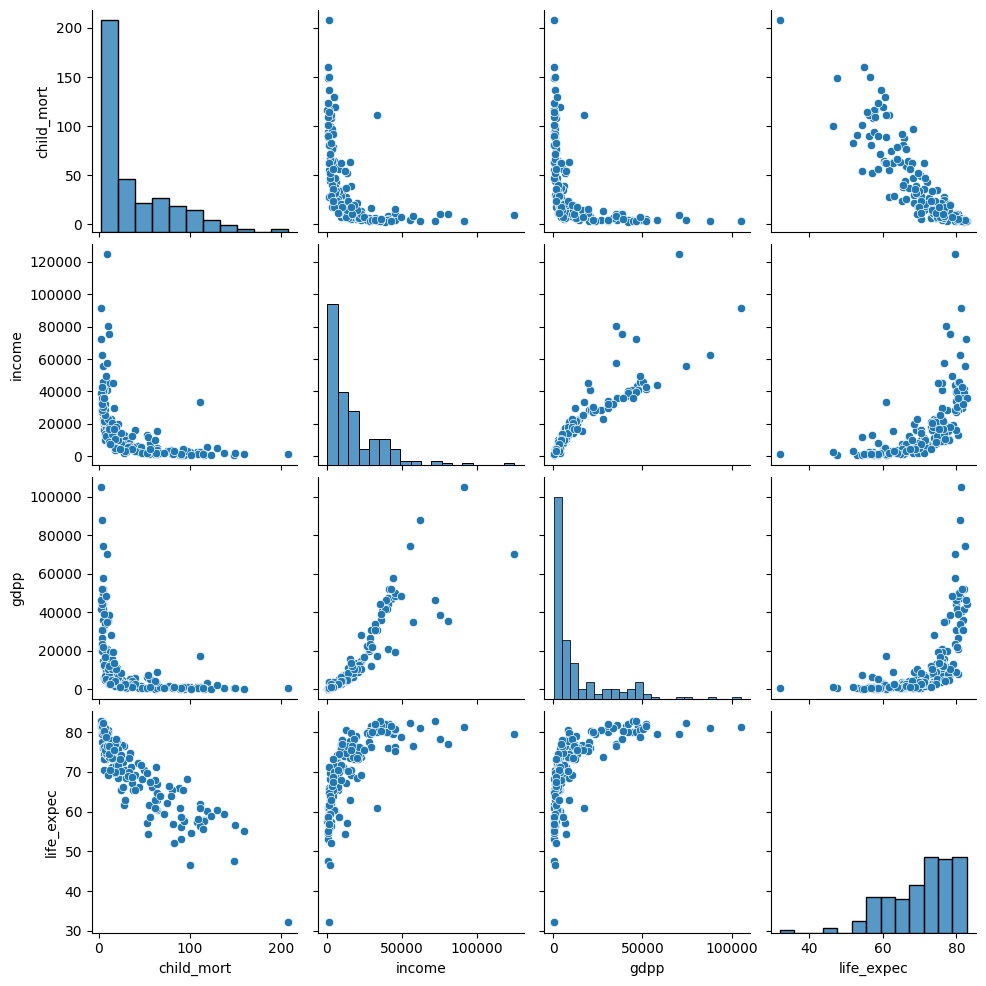

In [8]:
# Create pairplots to visualize relationships between features.
sns.pairplot(df[['child_mort', 'income', 'gdpp', 'life_expec']])
plt.show()


### Task 2: Initial K-means Clustering

1. Drop the `'country'` column since it's not a numerical feature and we can't use it for clustering. Perform this step in a new DataFrame called `'df_cluster1'`.
2. Use StandardScaler to standardize the numerical features in 'df_cluster1', ensuring they have a mean of 0 and a standard deviation of 1, bringing all features onto a common scale.
3. Apply K-Means clustering to the standardized data in 'df_cluster1' with an initial number of clusters (e.g., 4).
4. Print the inertia and centroids obtained from the KMeans model to understand the clustering performance.
5. Add the cluster labels to the original DataFrame 'df'.
6. Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

In [9]:
# Drop the 'country' column since it's not a numerical feature
df_numeric = df.drop('country', axis=1)


# Standardize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

#check few rows
df_scaled[:5]


array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ,
        -0.31234747,  0.64786643, -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447,
         0.78927429,  0.67042323, -0.0384044 , -0.46537561],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345,
         1.38705353, -1.17923442,  2.12815103, -0.51626829],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633, -0.04181713]])

In [10]:
# Perform KMeans clustering withh n_clusters as 4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model to the data (df_cluster)
kmeans.fit(df_scaled)



,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [11]:
#Print the inertia and centroids

#Inertia
print("Inertia:", kmeans.inertia_)

#Centroids
print("Centroids:")
print(kmeans.cluster_centers_)


Inertia: 751.1915754969667
Centroids:
[[-3.93281964e-01 -3.05837468e-02 -2.06179028e-01  1.95624679e-02
  -2.50930209e-01 -5.78314552e-03  2.26762439e-01 -4.02578619e-01
  -3.55832254e-01]
 [-8.27448664e-01  6.45079846e-01  7.27411220e-01  1.90638952e-01
   1.48424268e+00 -4.84920644e-01  1.07957853e+00 -7.91876866e-01
   1.61599536e+00]
 [ 1.39384127e+00 -4.54868650e-01 -1.77681122e-01 -1.66445221e-01
  -7.09742585e-01  2.00563083e-01 -1.30073355e+00  1.39120898e+00
  -6.13461880e-01]
 [ 2.28138502e+00 -5.78451631e-01 -6.37438082e-01 -1.22178479e+00
  -6.24064774e-01  9.12971806e+00 -1.13412081e+00  1.91613337e+00
  -5.81936274e-01]]


In [13]:
# Add the cluster labels to the original DataFrame 'df'.
df['Cluster'] = kmeans.labels_
print("KMeans Clustering Results:")
print(df[['country', 'Cluster']].head())

KMeans Clustering Results:
               country  Cluster
0          Afghanistan        2
1              Albania        0
2              Algeria        0
3               Angola        2
4  Antigua and Barbuda        0


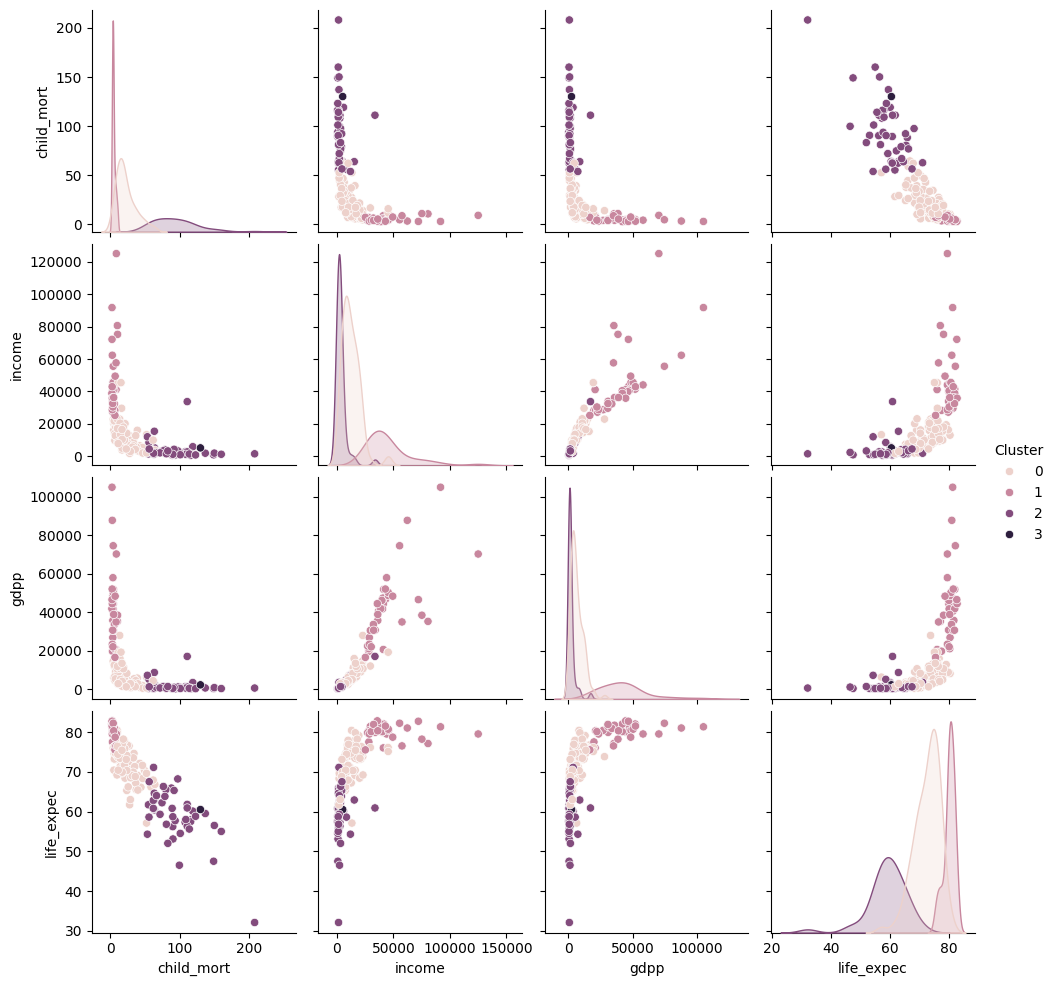

In [14]:
#Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.
sns.pairplot(df, hue='Cluster', vars=['child_mort', 'income', 'gdpp', 'life_expec'])
plt.show()


### Task3: Elbow Method for Determining Optimal Clusters

- Use the Elbow Method to determine the optimal number of clusters. Check clusters ranging from 1 to 20.
- Plot the Elbow Method graph to visualize the optimal number of clusters.
- Train the KMeans model using the number of clusters identified by the Elbow Method.

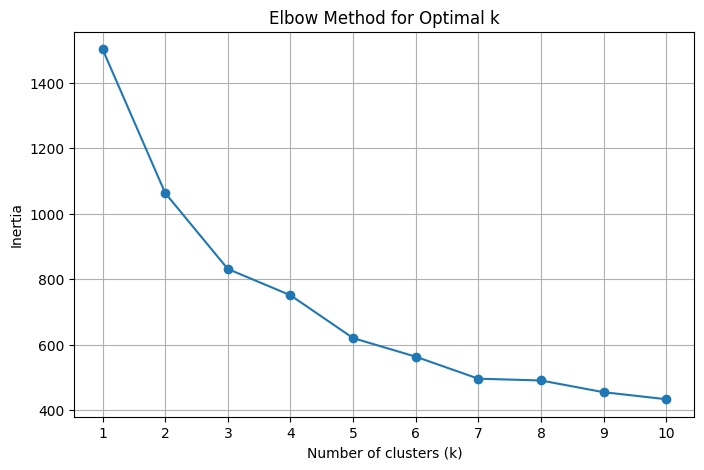

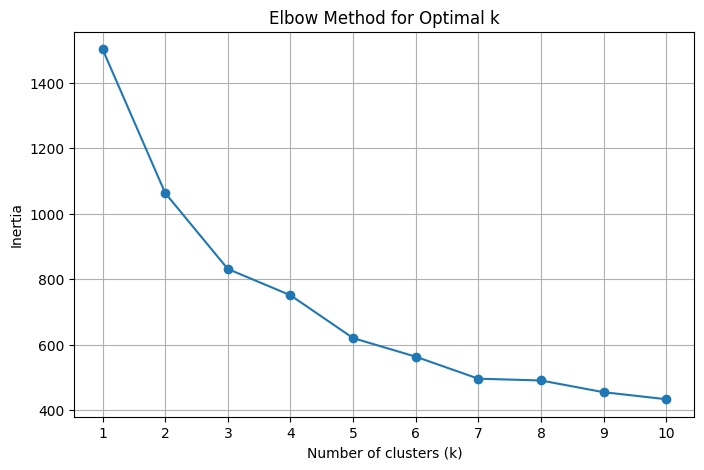

In [15]:
# Determine the optimal number of clusters using the Elbow Method
inertia_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()


# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

In [ ]:
# Train the KMeans model using the number of clusters identified by the Elbow Method.


# Perform KMeans clustering withh optimal n_clusters


# Fit the KMeans model to the data (df_cluster)


#assigning the cluster values


In [13]:
#Print the inertia and centroids

#Inertia


#Centroids


### Task 4: Hierarchical Clustering

1. Apply hierarchical clustering using Agglomerative Clustering with 6 clusters.
2. Use the following parameters: `metric='cosine', linkage='complete'`.
3. Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
4. Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points to ensure clarity.
5. Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

In [14]:
# Apply Agglomerative Clustering (6 clusters, metric='cosine', linkage='complete')


#Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.


In [15]:
# Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points



# Perform hierarchical/agglomerative clustering on subset
 

# Plotting the dendrogram for subset


In [17]:
# Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

